# AutoEncoder Model - Fraud

In [1]:
%config IPCompleter.greedy=True
#%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
#%load_ext autotime

In [2]:
import pandas as pd
import numpy as np

from keras.models import Model
from keras.layers import Input,Dense

C:\Users\Gregy\Anaconda3\Anaconda3_USC\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
df = pd.read_csv("data_afterpca.csv")

In [4]:
df.head()

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1,0.000277,-0.007366,-0.005802,-0.008016,-0.000140,-0.019152,0.001024,-0.011501,-0.004751,0.003628
1,2,-0.010390,-0.008809,0.004091,-0.005157,0.006581,-0.011030,-0.001370,0.002397,0.004269,0.002819
2,3,0.096099,0.203566,-0.032006,-0.032248,0.002193,-0.000888,-0.081251,0.013141,-0.101774,0.078984
3,4,0.015212,-0.025601,-0.018004,-0.022123,-0.056471,-0.025231,-0.063057,0.003809,-0.007457,-0.003059
4,5,0.005910,-0.027515,-0.008770,-0.016263,0.001501,-0.034412,-0.014604,0.000636,0.000833,0.001988


In [5]:
# Take the top 7 PCs that cover ~94% of variance
train_data = df.iloc[:, 1:8]
train_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.000277,-0.007366,-0.005802,-0.008016,-0.000140,-0.019152,0.001024
1,-0.010390,-0.008809,0.004091,-0.005157,0.006581,-0.011030,-0.001370
2,0.096099,0.203566,-0.032006,-0.032248,0.002193,-0.000888,-0.081251
3,0.015212,-0.025601,-0.018004,-0.022123,-0.056471,-0.025231,-0.063057
4,0.005910,-0.027515,-0.008770,-0.016263,0.001501,-0.034412,-0.014604


In [6]:
train_data.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,9.713159e-17,-5.176816e-17,-9.434584e-18,-1.483235e-16,-8.771696e-17,1.434835e-17,4.937039e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.012423e-02,-6.409325e+02,-7.147445e+02,-5.896804e+02,-7.354291e+01,-7.596727e+01,-1.894045e+02
25%,-1.200768e-02,-1.766771e-03,-4.019225e-04,-3.774865e-03,2.109047e-03,-1.253351e-02,-5.471702e-03
50%,-9.565047e-03,1.481738e-03,2.590560e-03,5.913131e-03,4.954212e-03,-8.081072e-03,-1.883970e-03
75%,-6.923130e-03,5.128215e-03,4.945496e-03,9.677343e-03,6.477329e-03,-2.144286e-03,1.082173e-03
max,6.085315e+02,5.528856e+02,2.496145e+02,5.900895e+01,7.198175e+02,6.598230e+02,6.801521e+02


In [7]:
train = train_data.values

In [8]:
input_size = 7
hidden_size = 4
code_size = 2

#autoencoder
input_layer = Input(shape=(input_size,)) 
hidden_1 = Dense(hidden_size, activation='relu')(input_layer)
code = Dense(code_size,activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_layer = Dense(input_size, activation='tanh')(hidden_2)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [11]:
output=autoencoder.fit(train,train, epochs = 100)

Epoch 1/100
1070994/1070994 [==============================] - 185s 173us/step - loss: 0.9940 - acc: 0.3019
Epoch 2/100
1070994/1070994 [==============================] - 175s 163us/step - loss: 0.9940 - acc: 0.2984
Epoch 3/100
1070994/1070994 [==============================] - 174s 162us/step - loss: 0.9938 - acc: 0.2998
Epoch 4/100
1070994/1070994 [==============================] - 175s 163us/step - loss: 0.9939 - acc: 0.3064
Epoch 5/100
1070994/1070994 [==============================] - 176s 164us/step - loss: 0.9939 - acc: 0.3011
Epoch 6/100
1070994/1070994 [==============================] - 175s 164us/step - loss: 0.9938 - acc: 0.3018
Epoch 7/100
1070994/1070994 [==============================] - 175s 164us/step - loss: 0.9940 - acc: 0.3017
Epoch 8/100
1070994/1070994 [==============================] - 176s 164us/step - loss: 0.9941 - acc: 0.3041
Epoch 9/100
1070994/1070994 [==============================] - 179s 167us/step - loss: 0.9942 - acc: 0.3074
Epoch 10/100
1070994/1070994

1070994/1070994 [==============================] - 165s 154us/step - loss: 0.9946 - acc: 0.3054
Epoch 77/100
1070994/1070994 [==============================] - 165s 154us/step - loss: 0.9946 - acc: 0.3050
Epoch 78/100
1070994/1070994 [==============================] - 165s 154us/step - loss: 0.9946 - acc: 0.3053
Epoch 79/100
1070994/1070994 [==============================] - 165s 154us/step - loss: 0.9946 - acc: 0.3030
Epoch 80/100
1070994/1070994 [==============================] - 165s 154us/step - loss: 0.9946 - acc: 0.3080
Epoch 81/100
1070994/1070994 [==============================] - 165s 154us/step - loss: 0.9947 - acc: 0.3091
Epoch 82/100
1070994/1070994 [==============================] - 166s 155us/step - loss: 0.9946 - acc: 0.3073
Epoch 83/100
1070994/1070994 [==============================] - 165s 154us/step - loss: 0.9950 - acc: 0.3067
Epoch 84/100
1070994/1070994 [==============================] - 166s 155us/step - loss: 0.9946 - acc: 0.3072
Epoch 85/100
1070994/1070994 [==

In [12]:
ans = autoencoder.predict(train)

In [13]:
ans = pd.DataFrame(ans)

In [25]:
ans.to_csv('ans_Reconstructed.csv',index=False)

In [23]:
ans.iloc[:,2].mean()


0.0011912730988115072

In [24]:
pd.DataFrame(train).iloc[:,2].mean()

-9.43458376834995e-18

In [14]:
#n=1
manhattan = (ans - pd.DataFrame(train)).abs()
manhattan_score = manhattan.sum(axis = 1)
manhattan_score

0          0.056584
1          0.039952
2          0.400472
3          0.138758
4          0.099675
5          0.032588
6          0.045342
7          0.072760
8          0.038966
9          0.043787
10         0.043993
11         0.041094
12         0.047367
13         0.145221
14         0.042593
15         0.121265
16         0.041451
17         0.031372
18         0.035269
19         0.023543
20         0.436443
21         0.052399
22         0.040813
23         0.052563
24         0.046866
25         0.041340
26         0.034733
27         0.031289
28         0.032818
29         0.038915
             ...   
1070964    0.090639
1070965    0.042188
1070966    0.011762
1070967    0.015606
1070968    0.016138
1070969    0.018495
1070970    0.085547
1070971    0.028101
1070972    0.040079
1070973    0.039875
1070974    0.089278
1070975    0.027033
1070976    0.097878
1070977    0.060603
1070978    0.048072
1070979    0.027288
1070980    0.015847
1070981    0.014914
1070982    0.023082


In [ ]:
m

In [15]:
#n=2
euclidean = (((ans - pd.DataFrame(train)).abs())**2).sum(axis=1)
euclidean_score = euclidean**(1/2)
euclidean_score

0          0.023870
1          0.017979
2          0.230180
3          0.061549
4          0.047285
5          0.014268
6          0.023121
7          0.032861
8          0.016512
9          0.019142
10         0.019184
11         0.019476
12         0.020633
13         0.064966
14         0.020921
15         0.058498
16         0.019058
17         0.016000
18         0.015907
19         0.010509
20         0.220826
21         0.025459
22         0.018299
23         0.025476
24         0.021624
25         0.017839
26         0.014971
27         0.014432
28         0.016478
29         0.017535
             ...   
1070964    0.041256
1070965    0.019214
1070966    0.005286
1070967    0.007520
1070968    0.008372
1070969    0.008226
1070970    0.037572
1070971    0.015051
1070972    0.022039
1070973    0.019219
1070974    0.041081
1070975    0.012410
1070976    0.044779
1070977    0.030270
1070978    0.021202
1070979    0.012288
1070980    0.007275
1070981    0.006684
1070982    0.010354


In [16]:
manhattan_score=pd.DataFrame(manhattan_score)
euclidean_score=pd.DataFrame(euclidean_score)
fraud_score_AE= pd.concat([manhattan_score,euclidean_score], axis=1)
fraud_score_AE.columns=['Manhattan Score','Euclidean Score']

In [17]:
fraud_score_AE.insert(0,'Record',fraud_score_AE.index+1)

In [18]:
fraud_score_AE.describe()

,Record,Manhattan Score,Euclidean Score
count,1.070994e+06,1.070994e+06,1.070994e+06
mean,5.354975e+05,9.391115e-02,4.231858e-02
std,3.091695e+05,6.676866e+00,2.638546e+00
min,1.000000e+00,6.131819e-03,3.535883e-03
25%,2.677492e+05,2.212938e-02,9.989042e-03
50%,5.354975e+05,2.920580e-02,1.340879e-02
75%,8.032458e+05,4.467034e-02,2.036522e-02
max,1.070994e+06,4.060946e+03,1.560318e+03


In [19]:
fraud_score_AE.to_csv('fraud_score_AE.csv',index=False)

In [26]:
fraud_score_AE.head()

,Record,Manhattan Score,Euclidean Score
0,1,0.056584,0.023870
1,2,0.039952,0.017979
2,3,0.400472,0.230180
3,4,0.138758,0.061549
4,5,0.099675,0.047285


In [72]:
#dfNY = pd.read_csv("NY property data.csv")

In [99]:
#eucScr = fraud_score_AE.drop('Manhattan Score', axis=1)

In [100]:
#eucScr.head()

,Record,Euclidean Score
0,1,0.023870
1,2,0.017979
2,3,0.230180
3,4,0.061549
4,5,0.047285


In [105]:
#bins=eucScr.shape[0]
#colName='Euclidean Score'
#eucScr['Euclidean Rank'] = eucScr['Euclidean Score'].rank(ascending=1)
fraud_score_AE['Euclidean Rank'] = fraud_score_AE['Euclidean Score'].rank(ascending=1)
fraud_score_AE['Manhattan Rank'] = fraud_score_AE['Manhattan Score'].rank(ascending=1)

In [106]:
fraud_score_AE.head()

,Record,Manhattan Score,Euclidean Score,Euclidean Rank,Manhattan Rank
0,1,0.056584,0.023870,892429.0,919927.0
1,2,0.039952,0.017979,733476.0,738537.0
2,3,0.400472,0.230180,1060936.0,1058333.0
3,4,0.138758,0.061549,1020751.0,1024992.0
4,5,0.099675,0.047285,1001707.5,1001755.5


In [109]:
fraud_score_AE.loc[fraud_score_AE['Manhattan Rank'] == 1000]

,Record,Manhattan Score,Euclidean Score,Euclidean Rank,Manhattan Rank
1025884,1025885,0.010858,0.004784,357.0,1000.0


In [107]:
fraud_score_AE.to_csv('fraud_ScoreAndRanks_AE.csv',index=False)

C:\Users\Gregy\Anaconda3\Anaconda3_USC\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


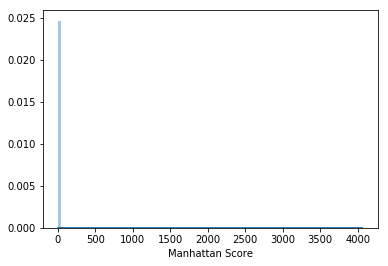

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(fraud_score_AE['Manhattan Score'],bins=100, kde=True)
#plt.title('Distribution of :'+col1)
#plt.ylabel('Density of probability', fontsize=12)
#plt.xlabel(col1, fontsize=12)
#plt.savefig("imgs/"+col1+".png")
plt.show()


C:\Users\Gregy\Anaconda3\Anaconda3_USC\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


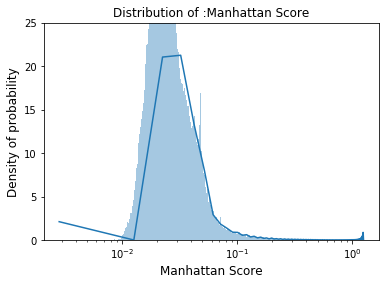

In [56]:
colName='Manhattan Score'
xhigh =1.25
#sns.plt.xlim(0,xhigh)
temp = fraud_score_AE[fraud_score_AE[colName] <= xhigh]
sns.distplot(temp[colName],bins=10000, kde=True)
plt.title('Distribution of :'+colName)
plt.xscale('log')
plt.ylabel('Density of probability', fontsize=12)
plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel(colName, fontsize=12)
#plt.savefig("imgs/"+colName+".png")
plt.show()

C:\Users\Gregy\Anaconda3\Anaconda3_USC\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


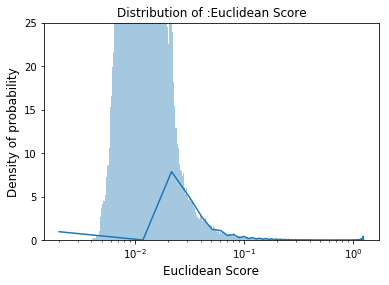

In [57]:
colName='Euclidean Score'
xhigh =1.25
#sns.plt.xlim(0,xhigh)
#temp = fraud_score_AE
temp = fraud_score_AE[fraud_score_AE[colName] <= xhigh]
sns.distplot(temp[colName],bins=10000, kde=True)
plt.title('Distribution of :'+colName)
plt.xscale('log')
plt.ylabel('Density of probability', fontsize=12)
plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel(colName, fontsize=12)
#plt.savefig("imgs/"+colName+".png")
plt.show()

In [50]:
bins=10
colName='Euclidean Score'
new_data = pd.qcut(fraud_score_AE[colName], bins, labels=list(range(bins)))

In [52]:
type(new_data)
new_data.value_counts()

8    107110
1    107102
6    107100
3    107100
0    107100
7    107099
5    107099
4    107099
2    107096
9    107089
Name: Euclidean Score, dtype: int64

In [53]:
pd.DataFrame(new_data).head()

,Euclidean Score
0,8
1,6
2,9
3,9
4,9
